#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder


import os


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

#### Reading train data

In [2]:
train = pd.read_csv('application_train.csv')

print(train.shape)

train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Reading test data

In [3]:
test = pd.read_csv('application_test.csv')

print(test.shape)

test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_train = train.copy()
df_test = test.copy()

### EDA

In [ ]:
###########################################################################################################################

#### R

#### Chi-Square Test

ChiTest <- function(data, cols = names(data), target)  #creating a function to display the p-values of a chi-square test(categorical. variable vs target binary variable) and o/p is stored as a data frame
{
  df <- data[,target]                                  #creating a separate data frame to store only the target variable
  
  if(length(unique(data[,c(target)]))>2)               #if the target variable is not binary, code will throw an error
  {
    stop('The target variable should only be binary')  #error message using stop function
  }
  data <- data[,c(cols)]                               #using only the user specified columns in the data frame(default - takes all columns)
  
  if(sum(names(data) %in% c(target))>0)                #if the target variable is also present in the original data frame
  {
    data <- data[,!(names(data) %in% c(target))]       #then removes that from the data frame as we don't want to run chi-square test against itself    
  }
  result = data.frame()                                #creating an empty data frame to store the result
  
  for(i in 1:ncol(data))                               #initiating for loop to start chi-square-test
  {
    if(is.factor(data[,i]))                            #checking if the column has categorical variables(class-factor)
    {
      c = chisq.test(table(data[,i],df))               #runs chi-square-test of that considered variable against the target variable
      
      result = rbind(result,data.frame(c$p.value,row.names = names((data)[i])))  #stores the result of chi-square-test(p-value) in the already created data frame including names of the features as the row names
    }                                                  #end if
  
  }                                                    #end for
  
  colnames(result) <- 'p-value'                        #assigning column name to the result data frame as 'p-value'
  
  print(result)                                        #printing the final output (p-value data frame)
}

train <- read.csv('application_train.csv')

str(train)

In [4]:
ChiTest(train,target = 'TARGET')

Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"

                                 p-value
NAME_CONTRACT_TYPE          1.023515e-65
CODE_GENDER                1.129022e-200
FLAG_OWN_CAR                9.330994e-34
FLAG_OWN_REALTY             6.681470e-04
NAME_TYPE_SUITE             1.256203e-07
NAME_INCOME_TYPE           1.928146e-266
NAME_EDUCATION_TYPE        2.447681e-219
NAME_FAMILY_STATUS         7.744842e-107
NAME_HOUSING_TYPE           1.099089e-88
OCCUPATION_TYPE             0.000000e+00
WEEKDAY_APPR_PROCESS_START  1.744737e-02
ORGANIZATION_TYPE          5.224541e-299
FONDKAPREMONT_MODE          9.504317e-60
HOUSETYPE_MODE             4.369310e-110
WALLSMATERIAL_MODE         3.916842e-125
EMERGENCYSTATE_MODE        1.019821e-119


In [5]:
c <- ChiTest(train,target = 'TARGET')

Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"Warning message in chisq.test(table(data[, i], df)):
"Chi-squared approximation may be incorrect"

                                 p-value
NAME_CONTRACT_TYPE          1.023515e-65
CODE_GENDER                1.129022e-200
FLAG_OWN_CAR                9.330994e-34
FLAG_OWN_REALTY             6.681470e-04
NAME_TYPE_SUITE             1.256203e-07
NAME_INCOME_TYPE           1.928146e-266
NAME_EDUCATION_TYPE        2.447681e-219
NAME_FAMILY_STATUS         7.744842e-107
NAME_HOUSING_TYPE           1.099089e-88
OCCUPATION_TYPE             0.000000e+00
WEEKDAY_APPR_PROCESS_START  1.744737e-02
ORGANIZATION_TYPE          5.224541e-299
FONDKAPREMONT_MODE          9.504317e-60
HOUSETYPE_MODE             4.369310e-110
WALLSMATERIAL_MODE         3.916842e-125
EMERGENCYSTATE_MODE        1.019821e-119


In [6]:
dim(c)

[1] 16  1

In [7]:
length(c[c[,'p-value'] < 0.05,])

[1] 16

In [8]:
subset(c,c[,'p-value'] < 0.05)

,p-value
NAME_CONTRACT_TYPE,1.023515e-65
CODE_GENDER,1.129022e-200
FLAG_OWN_CAR,9.330994e-34
FLAG_OWN_REALTY,6.681470e-04
NAME_TYPE_SUITE,1.256203e-07
NAME_INCOME_TYPE,1.928146e-266
NAME_EDUCATION_TYPE,2.447681e-219
NAME_FAMILY_STATUS,7.744842e-107
NAME_HOUSING_TYPE,1.099089e-88
OCCUPATION_TYPE,0.000000e+00


In [9]:
row.names(subset(c,c[,'p-value'] < 0.05))

[1] "NAME_CONTRACT_TYPE"         "CODE_GENDER"               
 [3] "FLAG_OWN_CAR"               "FLAG_OWN_REALTY"           
 [5] "NAME_TYPE_SUITE"            "NAME_INCOME_TYPE"          
 [7] "NAME_EDUCATION_TYPE"        "NAME_FAMILY_STATUS"        
 [9] "NAME_HOUSING_TYPE"          "OCCUPATION_TYPE"           
[11] "WEEKDAY_APPR_PROCESS_START" "ORGANIZATION_TYPE"         
[13] "FONDKAPREMONT_MODE"         "HOUSETYPE_MODE"            
[15] "WALLSMATERIAL_MODE"         "EMERGENCYSTATE_MODE"

#### T-test

In [10]:
TTest <- function(data, cols = names(data), target)    #creating a function to display the p-values of a t-test(num. variable vs target binary variable) and o/p is stored as a data frame
{
  df <- data[,target]                                  #creating a separate data frame to store only the target variable
  
  if(length(unique(data[,c(target)]))>2)               #if the target variable is not binary, code will throw an error 
  {
    stop('The target variable should only be binary')  #error message using stop function
  }
  data <- data[,c(cols)]                               #using only the user specified columns in the data frame(default - takes all columns)
  
  if(sum(names(data) %in% c(target))>0)                #if the target variable is also present in the original data frame
  {
    data <- data[,!(names(data) %in% c(target))]       #then removes that from the data frame as we don't want to run t-test against itself
  }
  result = data.frame()                                #creating an empty data frame to store the result
  
  for(i in 1:ncol(data))                               #initiating for loop to start t-test
  {
    if(is.numeric(data[,i]))                           #checking if the column has numerical variables(class-numeric)
    {
      t = t.test(data[,i]~df)                          #runs t-test of that considered variable against the target variable 
      
      result = rbind(result,data.frame(t$p.value,row.names = names((data)[i])))  #stores the result of t-test(p-value) in the already created data frame including names of the features as the row names
    }                                                  #end if
  
  }                                                    #end for
  
  colnames(result) <- 'p-value'                        #assigning column name to the result data frame as 'p-value'
  
  print(result)                                        #printing the final output (p-value data frame)
}


In [11]:
TTest(train,target = 'TARGET')

                                   p-value
SK_ID_CURR                    2.406210e-01
CNT_CHILDREN                  2.381146e-24
AMT_INCOME_TOTAL              4.649904e-01
AMT_CREDIT                    2.721911e-82
AMT_ANNUITY                   3.857944e-16
AMT_GOODS_PRICE              4.280023e-143
REGION_POPULATION_RELATIVE   2.446249e-122
DAYS_BIRTH                    0.000000e+00
DAYS_EMPLOYED                4.919699e-182
DAYS_REGISTRATION            2.169540e-133
DAYS_ID_PUBLISH              3.736621e-175
OWN_CAR_AGE                   3.325749e-31
FLAG_MOBIL                    3.173114e-01
FLAG_EMP_PHONE               6.655556e-190
FLAG_WORK_PHONE               3.651176e-50
FLAG_CONT_MOBILE              8.352318e-01
FLAG_PHONE                    7.561012e-43
FLAG_EMAIL                    3.244551e-01
CNT_FAM_MEMBERS               7.117755e-07
REGION_RATING_CLIENT         3.562463e-233
REGION_RATING_CLIENT_W_CITY  8.349743e-248
HOUR_APPR_PROCESS_START       1.968608e-40
REG_REGION_

In [12]:
t <- TTest(train,target = 'TARGET')

                                   p-value
SK_ID_CURR                    2.406210e-01
CNT_CHILDREN                  2.381146e-24
AMT_INCOME_TOTAL              4.649904e-01
AMT_CREDIT                    2.721911e-82
AMT_ANNUITY                   3.857944e-16
AMT_GOODS_PRICE              4.280023e-143
REGION_POPULATION_RELATIVE   2.446249e-122
DAYS_BIRTH                    0.000000e+00
DAYS_EMPLOYED                4.919699e-182
DAYS_REGISTRATION            2.169540e-133
DAYS_ID_PUBLISH              3.736621e-175
OWN_CAR_AGE                   3.325749e-31
FLAG_MOBIL                    3.173114e-01
FLAG_EMP_PHONE               6.655556e-190
FLAG_WORK_PHONE               3.651176e-50
FLAG_CONT_MOBILE              8.352318e-01
FLAG_PHONE                    7.561012e-43
FLAG_EMAIL                    3.244551e-01
CNT_FAM_MEMBERS               7.117755e-07
REGION_RATING_CLIENT         3.562463e-233
REGION_RATING_CLIENT_W_CITY  8.349743e-248
HOUR_APPR_PROCESS_START       1.968608e-40
REG_REGION_

In [13]:
str(t)

'data.frame':	105 obs. of  1 variable:
 $ p-value: num  2.41e-01 2.38e-24 4.65e-01 2.72e-82 3.86e-16 ...


In [14]:
names(t)

[1] "p-value"

In [15]:
dim(t)

[1] 105   1

In [16]:
length(t[t[,'p-value'] < 0.05,])

[1] 85

In [17]:
subset(t,t[,'p-value'] < 0.05)

,p-value
CNT_CHILDREN,2.381146e-24
AMT_CREDIT,2.721911e-82
AMT_ANNUITY,3.857944e-16
AMT_GOODS_PRICE,4.280023e-143
REGION_POPULATION_RELATIVE,2.446249e-122
DAYS_BIRTH,0.000000e+00
DAYS_EMPLOYED,4.919699e-182
DAYS_REGISTRATION,2.169540e-133
DAYS_ID_PUBLISH,3.736621e-175
OWN_CAR_AGE,3.325749e-31


In [18]:
row.names(subset(t,t[,'p-value'] < 0.05))

[1] "CNT_CHILDREN"                 "AMT_CREDIT"                  
 [3] "AMT_ANNUITY"                  "AMT_GOODS_PRICE"             
 [5] "REGION_POPULATION_RELATIVE"   "DAYS_BIRTH"                  
 [7] "DAYS_EMPLOYED"                "DAYS_REGISTRATION"           
 [9] "DAYS_ID_PUBLISH"              "OWN_CAR_AGE"                 
[11] "FLAG_EMP_PHONE"               "FLAG_WORK_PHONE"             
[13] "FLAG_PHONE"                   "CNT_FAM_MEMBERS"             
[15] "REGION_RATING_CLIENT"         "REGION_RATING_CLIENT_W_CITY" 
[17] "HOUR_APPR_PROCESS_START"      "REG_REGION_NOT_LIVE_REGION"  
[19] "REG_REGION_NOT_WORK_REGION"   "REG_CITY_NOT_LIVE_CITY"      
[21] "REG_CITY_NOT_WORK_CITY"       "LIVE_CITY_NOT_WORK_CITY"     
[23] "EXT_SOURCE_1"                 "EXT_SOURCE_2"                
[25] "EXT_SOURCE_3"                 "APARTMENTS_AVG"              
[27] "BASEMENTAREA_AVG"             "YEARS_BEGINEXPLUATATION_AVG" 
[29] "YEARS_BUILD_AVG"              "COMMONAREA_AVG"              
[31] "ELEVATORS_AVG"                "ENTRANCES_AVG"               
[33] "FLOORSMAX_AVG"                "FLOORSMIN_AVG"               
[35] "LANDAREA_AVG"                 "LIVINGAPARTMENTS_AVG"        
[37] "LIVINGAREA_AVG"               "NONLIVINGAREA_AVG"           
[39] "APARTMENTS_MODE"              "BASEMENTAREA_MODE"           
[41] "YEARS_BEGINEXPLUATATION_MODE" "YEARS_BUILD_MODE"            
[43] "COMMONAREA_MODE"              "ELEVATORS_MODE"              
[45] "ENTRANCES_MODE"               "FLOORSMAX_MODE"              
[47] "FLOORSMIN_MODE"               "LANDAREA_MODE"               
[49] "LIVINGAPARTMENTS_MODE"        "LIVINGAREA_MODE"             
[51] "NONLIVINGAREA_MODE"           "APARTMENTS_MEDI"             
[53] "BASEMENTAREA_MEDI"            "YEARS_BEGINEXPLUATATION_MEDI"
[55] "YEARS_BUILD_MEDI"             "COMMONAREA_MEDI"             
[57] "ELEVATORS_MEDI"               "ENTRANCES_MEDI"              
[59] "FLOORSMAX_MEDI"               "FLOORSMIN_MEDI"              
[61] "LANDAREA_MEDI"                "LIVINGAPARTMENTS_MEDI"       
[63] "LIVINGAREA_MEDI"              "NONLIVINGAREA_MEDI"          
[65] "TOTALAREA_MODE"               "OBS_30_CNT_SOCIAL_CIRCLE"    
[67] "DEF_30_CNT_SOCIAL_CIRCLE"     "OBS_60_CNT_SOCIAL_CIRCLE"    
[69] "DEF_60_CNT_SOCIAL_CIRCLE"     "DAYS_LAST_PHONE_CHANGE"      
[71] "FLAG_DOCUMENT_3"              "FLAG_DOCUMENT_4"             
[73] "FLAG_DOCUMENT_6"              "FLAG_DOCUMENT_8"             
[75] "FLAG_DOCUMENT_9"              "FLAG_DOCUMENT_10"            
[77] "FLAG_DOCUMENT_11"             "FLAG_DOCUMENT_13"            
[79] "FLAG_DOCUMENT_14"             "FLAG_DOCUMENT_15"            
[81] "FLAG_DOCUMENT_16"             "FLAG_DOCUMENT_17"            
[83] "FLAG_DOCUMENT_18"             "AMT_REQ_CREDIT_BUREAU_MON"   
[85] "AMT_REQ_CREDIT_BUREAU_YEAR"

In [19]:
subset(t,t[,'p-value'] >= 0.05)

,p-value
SK_ID_CURR,0.2406210
AMT_INCOME_TOTAL,0.4649904
FLAG_MOBIL,0.3173114
FLAG_CONT_MOBILE,0.8352318
FLAG_EMAIL,0.3244551
LIVE_REGION_NOT_WORK_REGION,0.1253107
NONLIVINGAPARTMENTS_AVG,0.3196884
NONLIVINGAPARTMENTS_MODE,0.6355909
NONLIVINGAPARTMENTS_MEDI,0.3912344
FLAG_DOCUMENT_2,0.1115841


In [20]:
row.names(subset(t,t[,'p-value'] >= 0.05))

[1] "SK_ID_CURR"                  "AMT_INCOME_TOTAL"           
 [3] "FLAG_MOBIL"                  "FLAG_CONT_MOBILE"           
 [5] "FLAG_EMAIL"                  "LIVE_REGION_NOT_WORK_REGION"
 [7] "NONLIVINGAPARTMENTS_AVG"     "NONLIVINGAPARTMENTS_MODE"   
 [9] "NONLIVINGAPARTMENTS_MEDI"    "FLAG_DOCUMENT_2"            
[11] "FLAG_DOCUMENT_5"             "FLAG_DOCUMENT_7"            
[13] "FLAG_DOCUMENT_12"            "FLAG_DOCUMENT_19"           
[15] "FLAG_DOCUMENT_20"            "FLAG_DOCUMENT_21"           
[17] "AMT_REQ_CREDIT_BUREAU_HOUR"  "AMT_REQ_CREDIT_BUREAU_DAY"  
[19] "AMT_REQ_CREDIT_BUREAU_WEEK"  "AMT_REQ_CREDIT_BUREAU_QRT"

In [ ]:
###########################################################################################################################

#### Python

In [5]:
df_train.loc[df_train['OWN_CAR_AGE']==0,'OWN_CAR_AGE'] = 1

In [6]:
df_train[['OWN_CAR_AGE']].groupby(df_train['FLAG_OWN_CAR']).median()

,OWN_CAR_AGE
FLAG_OWN_CAR,
N,NaN
Y,9.0


In [7]:
df_train.loc[(df_train['OWN_CAR_AGE'].isnull() == True) & (df_train['FLAG_OWN_CAR'] == 'Y'),'OWN_CAR_AGE'] = 9

In [8]:
df_train.loc[(df_train['OWN_CAR_AGE'].isnull() == True) & (df_train['FLAG_OWN_CAR'] == 'N'),'OWN_CAR_AGE'] = 0

In [9]:
df_train[['OWN_CAR_AGE']].groupby(df_train['FLAG_OWN_CAR']).median()

,OWN_CAR_AGE
FLAG_OWN_CAR,
N,0.0
Y,9.0


In [10]:
df_train = df_train.drop(columns=['SK_ID_CURR','AMT_INCOME_TOTAL','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL','LIVE_REGION_NOT_WORK_REGION',
                                  'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','FLAG_DOCUMENT_2','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7',
                                  'FLAG_DOCUMENT_12','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                                  'AMT_REQ_CREDIT_BUREAU_QRT'],axis=1)

In [11]:
df_train.shape

(307511, 102)

In [12]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [13]:
iv_woe(df_train,"TARGET",bins=10,show_woe=False)

Information value of NAME_CONTRACT_TYPE is 0.015039
Information value of CODE_GENDER is 0.038599
Information value of FLAG_OWN_CAR is 0.006597
Information value of FLAG_OWN_REALTY is 0.000505
Information value of CNT_CHILDREN is 0.001669
Information value of AMT_CREDIT is 0.045073
Information value of AMT_ANNUITY is 0.026595
Information value of AMT_GOODS_PRICE is 0.092017
Information value of NAME_TYPE_SUITE is 0.001447
Information value of NAME_INCOME_TYPE is 0.058381
Information value of NAME_EDUCATION_TYPE is 0.050836
Information value of NAME_FAMILY_STATUS is 0.021711
Information value of NAME_HOUSING_TYPE is 0.01573
Information value of REGION_POPULATION_RELATIVE is 0.035094
Information value of DAYS_BIRTH is 0.0842
Information value of DAYS_EMPLOYED is 0.101263
Information value of DAYS_REGISTRATION is 0.026872
Information value of DAYS_ID_PUBLISH is 0.038453
Information value of OWN_CAR_AGE is 0.017934
Information value of FLAG_EMP_PHONE is 0.032907
Information value of FLAG_WO

(                      Variable        IV
 0           NAME_CONTRACT_TYPE  0.015039
 0                  CODE_GENDER  0.038599
 0                 FLAG_OWN_CAR  0.006597
 0              FLAG_OWN_REALTY  0.000505
 0                 CNT_CHILDREN  0.001669
 ..                         ...       ...
 0             FLAG_DOCUMENT_16  0.002260
 0             FLAG_DOCUMENT_17  0.000254
 0             FLAG_DOCUMENT_18  0.000996
 0    AMT_REQ_CREDIT_BUREAU_MON  0.002078
 0   AMT_REQ_CREDIT_BUREAU_YEAR  0.005674
 
 [101 rows x 2 columns],
                       Variable           Cutoff       N  Events  % of Events  \
 0           NAME_CONTRACT_TYPE       Cash loans  278232   23221     0.935388   
 1           NAME_CONTRACT_TYPE  Revolving loans   29279    1604     0.064612   
 0                  CODE_GENDER                F  202448   14170     0.570796   
 1                  CODE_GENDER                M  105059   10655     0.429204   
 2                  CODE_GENDER              XNA       4       0

In [14]:
iv = iv_woe(df_train,"TARGET",bins=10,show_woe=False)

Information value of NAME_CONTRACT_TYPE is 0.015039
Information value of CODE_GENDER is 0.038599
Information value of FLAG_OWN_CAR is 0.006597
Information value of FLAG_OWN_REALTY is 0.000505
Information value of CNT_CHILDREN is 0.001669
Information value of AMT_CREDIT is 0.045073
Information value of AMT_ANNUITY is 0.026595
Information value of AMT_GOODS_PRICE is 0.092017
Information value of NAME_TYPE_SUITE is 0.001447
Information value of NAME_INCOME_TYPE is 0.058381
Information value of NAME_EDUCATION_TYPE is 0.050836
Information value of NAME_FAMILY_STATUS is 0.021711
Information value of NAME_HOUSING_TYPE is 0.01573
Information value of REGION_POPULATION_RELATIVE is 0.035094
Information value of DAYS_BIRTH is 0.0842
Information value of DAYS_EMPLOYED is 0.101263
Information value of DAYS_REGISTRATION is 0.026872
Information value of DAYS_ID_PUBLISH is 0.038453
Information value of OWN_CAR_AGE is 0.017934
Information value of FLAG_EMP_PHONE is 0.032907
Information value of FLAG_WO

In [15]:
iv = iv[0]

In [16]:
pre=[]
med=[]
rej=[]
for i in range(len(iv)):
    if (iv.iloc[i,1])>0.1:
        pre.append(iv.iloc[i,0])
    if  (iv.iloc[i,1])<0.1 and  (iv.iloc[i,1])>0.03:
        med.append(iv.iloc[i,0])
    if (iv.iloc[i,1])<0.03:
        rej.append(iv.iloc[i,0])

In [17]:
pre

['DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [18]:
med

['CODE_GENDER',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'DAYS_LAST_PHONE_CHANGE']

In [19]:
rej

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATI

In [20]:
df_train = df_train.drop(columns=['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_REGISTRATION',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [21]:
df_train.shape

(307511, 24)

In [22]:
df_train.describe()

,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
count,307511.000000,3.075110e+05,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,154491.000000,154491.000000,154491.000000,307510.000000
mean,0.080729,5.990260e+05,5.383962e+05,0.020868,-16036.995067,63815.045904,-2994.202373,4.108965,0.819889,2.052463,2.031521,0.230454,0.502130,5.143927e-01,0.510853,0.226282,0.222315,0.225897,-962.858788
std,0.272419,4.024908e+05,3.694465e+05,0.013831,4363.988632,141275.766519,1509.450419,9.006742,0.384280,0.509034,0.502737,0.421124,0.211062,1.910602e-01,0.194844,0.144641,0.143709,0.145067,826.808487
min,0.000000,4.500000e+04,4.050000e+04,0.000290,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000,0.000000,0.000000,-4292.000000
25%,0.000000,2.700000e+05,2.385000e+05,0.010006,-19682.000000,-2760.000000,-4299.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.334007,3.924574e-01,0.370650,0.166700,0.166700,0.166700,-1570.000000
50%,0.000000,5.135310e+05,4.500000e+05,0.018850,-15750.000000,-1213.000000,-3254.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.505998,5.659614e-01,0.535276,0.166700,0.166700,0.166700,-757.000000
75%,0.000000,8.086500e+05,6.795000e+05,0.028663,-12413.000000,-289.000000,-1720.000000,5.000000,1.000000,2.000000,2.000000,0.000000,0.675053,6.636171e-01,0.669057,0.333300,0.333300,0.333300,-274.000000
max,1.000000,4.050000e+06,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,91.000000,1.000000,3.000000,3.000000,1.000000,0.962693,8.549997e-01,0.896010,1.000000,1.000000,1.000000,0.000000


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   CODE_GENDER                  307511 non-null  object 
 2   AMT_CREDIT                   307511 non-null  float64
 3   AMT_GOODS_PRICE              307233 non-null  float64
 4   NAME_INCOME_TYPE             307511 non-null  object 
 5   NAME_EDUCATION_TYPE          307511 non-null  object 
 6   REGION_POPULATION_RELATIVE   307511 non-null  float64
 7   DAYS_BIRTH                   307511 non-null  int64  
 8   DAYS_EMPLOYED                307511 non-null  int64  
 9   DAYS_ID_PUBLISH              307511 non-null  int64  
 10  OWN_CAR_AGE                  307511 non-null  float64
 11  FLAG_EMP_PHONE               307511 non-null  int64  
 12  OCCUPATION_TYPE              211120 non-null  object 
 13 

In [24]:
df_train.isnull().sum()

TARGET                              0
CODE_GENDER                         0
AMT_CREDIT                          0
AMT_GOODS_PRICE                   278
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                         0
FLAG_EMP_PHONE                      0
OCCUPATION_TYPE                 96391
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REG_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                   0
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
FLOORSMAX_AVG                  153020
FLOORSMAX_MODE                 153020
FLOORSMAX_MEDI                 153020
DAYS_LAST_PHONE_CHANGE              1
dtype: int64

In [25]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [26]:
# Missing values statistics
missing_values_table(df_train)

Your selected dataframe has 24 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
EXT_SOURCE_1,173378,56.4
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
FLOORSMAX_MEDI,153020,49.8
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
DAYS_LAST_PHONE_CHANGE,1,0.0


## Missing value Imputation

In [27]:
df_train['EXT_SOURCE_1'][df_train['EXT_SOURCE_1'].isnull()] = np.median(df_train.EXT_SOURCE_1[df_train.EXT_SOURCE_1>0])

In [28]:
df_train['FLOORSMAX_AVG'][df_train['FLOORSMAX_AVG'].isnull()] = np.median(df_train.FLOORSMAX_AVG[df_train.FLOORSMAX_AVG>0])

In [29]:
df_train['FLOORSMAX_MODE'][df_train['FLOORSMAX_MODE'].isnull()] = np.median(df_train.FLOORSMAX_MODE[df_train.FLOORSMAX_MODE>0])

In [30]:
df_train['FLOORSMAX_MEDI'][df_train['FLOORSMAX_MEDI'].isnull()] = np.median(df_train.FLOORSMAX_MEDI[df_train.FLOORSMAX_MEDI>0])

In [31]:
df_train['EXT_SOURCE_2'][df_train['EXT_SOURCE_2'].isnull()] = np.median(df_train.EXT_SOURCE_2[df_train.EXT_SOURCE_2>0])

In [32]:
df_train['EXT_SOURCE_3'][df_train['EXT_SOURCE_3'].isnull()] = np.median(df_train.EXT_SOURCE_3[df_train.EXT_SOURCE_3>0])

In [33]:
df_train['DAYS_LAST_PHONE_CHANGE'][df_train['DAYS_LAST_PHONE_CHANGE'].isnull()] = 0

In [34]:
missing_values_table(df_train)

Your selected dataframe has 24 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,96391,31.3
AMT_GOODS_PRICE,278,0.1


In [35]:
from sklearn.impute import KNNImputer

In [36]:
imputer = KNNImputer(n_neighbors=49)

In [37]:
df_train['AMT_GOODS_PRICE'] = imputer.fit_transform(df_train[['AMT_GOODS_PRICE']])

In [38]:
missing_values_table(df_train)

Your selected dataframe has 24 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,96391,31.3


In [39]:
df_train.columns

Index(['TARGET', 'CODE_GENDER', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [40]:
#knn_train = df_train[df_train['OCCUPATION_TYPE'].isnull() == 0]
#knn_test = df_train[df_train['OCCUPATION_TYPE'].isnull() == 1]

In [41]:
#X_train = knn_train.drop(['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE'],axis=1)
#y_train = knn_train['OCCUPATION_TYPE']
#X_test = knn_test.drop(['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE'],axis=1)
#y_test = knn_test['OCCUPATION_TYPE']

In [42]:
#loading library
#from sklearn.neighbors import KNeighborsClassifier

#instantiate learning model(k=21)
#knn = KNeighborsClassifier(n_neighbors=21)

#fitting the model
#knn.fit(X_train, y_train)

In [43]:
#pred = knn.predict(X_test)

In [44]:
#len(pred)

In [45]:
#len(y_test)

In [46]:
#y_test = pred

In [47]:
#df_train['OCCUPATION_TYPE'][df_train['OCCUPATION_TYPE'].isnull()] = pred

In [48]:
#df_train['OCCUPATION_TYPE'].to_csv('OCCUPATION_TYPE.csv',index=False)

In [49]:
xx = pd.read_csv('OCCUPATION_TYPE.csv')

In [50]:
xx

,OCCUPATION_TYPE
0,Laborers
1,Core staff
2,Laborers
3,Laborers
4,Core staff
...,...
307506,Sales staff
307507,Cleaning staff
307508,Managers
307509,Laborers


In [51]:
df_train['OCCUPATION_TYPE'] = xx['OCCUPATION_TYPE']

In [52]:
missing_values_table(df_train)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [53]:
#from functions import graphs_r0

In [54]:
#graphs_r0(df_train,directory='D:\DS\Python\Praxis\FMO\home-credit-default-risk\Graphs')

## Outier/Anamoly Correction

In [55]:
df_train['DAYS_BIRTH'] = (df_train['DAYS_BIRTH']/-365)

In [56]:
df_train['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [57]:
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [58]:
sum(df_train['DAYS_EMPLOYED'] == 365243)

55374

In [59]:
sum(df_train['DAYS_EMPLOYED'] != 365243)

252137

In [60]:
np.mean(df_train.loc[df_train['DAYS_EMPLOYED'] != 365243,'DAYS_EMPLOYED'])

-2384.1693246132063

In [61]:
np.median(df_train.loc[df_train['DAYS_EMPLOYED'] != 365243,'DAYS_EMPLOYED'])

-1648.0

In [62]:
df_train.loc[df_train['DAYS_EMPLOYED'] == 365243,'DAYS_EMPLOYED'] = np.median(df_train.loc[df_train['DAYS_EMPLOYED'] != 365243,'DAYS_EMPLOYED'])

In [63]:
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      -2251.606131
std        2136.193492
min      -17912.000000
25%       -2760.000000
50%       -1648.000000
75%        -933.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [64]:
df_train['DAYS_EMPLOYED'] = (df_train['DAYS_EMPLOYED']/-365)

In [65]:
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean          6.168784
std           5.852585
min          -0.000000
25%           2.556164
50%           4.515068
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

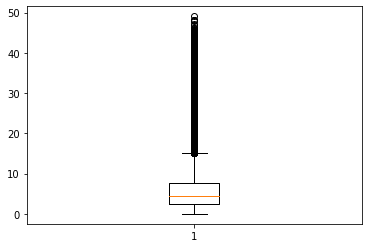

In [66]:
plt.boxplot(df_train['DAYS_EMPLOYED'])
plt.show()

In [67]:
df_train['OWN_CAR_AGE'].describe()

count    307511.000000
mean          4.108965
std           9.006742
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [68]:
df_train.loc[df_train['OWN_CAR_AGE'] >= 40,]

,TARGET,CODE_GENDER,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,...,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
85,0,M,796396.5,643500.0,Working,Higher education,0.008019,43.586301,2.997260,-4180,...,2,1,Industry: type 11,0.447675,0.495765,0.824595,0.1667,0.1667,0.1667,-1876.0
134,0,F,945000.0,945000.0,Commercial associate,Secondary / secondary special,0.018209,39.000000,14.824658,-5376,...,3,0,Medicine,0.505998,0.597823,0.746300,0.1250,0.1250,0.1250,-2703.0
237,0,F,646920.0,540000.0,Pensioner,Secondary / secondary special,0.019101,64.794521,4.515068,-4923,...,2,0,XNA,0.505998,0.731907,0.720944,0.1667,0.1667,0.1667,-1563.0
272,0,F,288873.0,238500.0,Working,Higher education,0.018029,27.953425,0.161644,-2513,...,3,0,Business Entity Type 2,0.264876,0.592295,0.495666,0.3333,0.3333,0.3333,-1441.0
369,0,F,688500.0,688500.0,Working,Higher education,0.025164,35.567123,7.808219,-5139,...,2,0,Kindergarten,0.340206,0.335586,0.710674,0.0833,0.0833,0.0833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306946,1,M,143910.0,135000.0,Working,Secondary / secondary special,0.011657,34.104110,1.191781,-4572,...,1,1,Other,0.505998,0.569514,0.321735,0.1667,0.1667,0.1667,-495.0
307029,0,F,808650.0,675000.0,Pensioner,Secondary / secondary special,0.008625,57.353425,4.515068,-4376,...,2,0,XNA,0.914571,0.565961,0.725276,0.1667,0.1667,0.1667,-1110.0
307076,0,F,315000.0,315000.0,Pensioner,Secondary / secondary special,0.008625,58.594521,4.515068,-1249,...,2,0,XNA,0.505998,0.135198,0.593718,0.1667,0.1667,0.1667,-527.0
307132,0,M,323194.5,279000.0,Working,Higher education,0.010643,49.602740,4.139726,-1650,...,2,1,Industry: type 4,0.505998,0.340681,0.652897,0.1250,0.1250,0.1250,-337.0


In [69]:
df_train.loc[df_train['OWN_CAR_AGE'] >= 40,['DAYS_BIRTH','OWN_CAR_AGE']]

,DAYS_BIRTH,OWN_CAR_AGE
85,43.586301,65.0
134,39.000000,65.0
237,64.794521,64.0
272,27.953425,65.0
369,35.567123,64.0
...,...,...
306946,34.104110,64.0
307029,57.353425,64.0
307076,58.594521,64.0
307132,49.602740,65.0


In [70]:
len(df_train.loc[df_train['OWN_CAR_AGE'] >= 40,['DAYS_BIRTH','OWN_CAR_AGE']])/len(df_train)

0.01174266936792505

## Multicollinearity check

In [71]:
df_train.corr()

,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
TARGET,1.000000,-0.030369,-0.039628,-0.037227,-0.078239,-0.063368,0.051457,0.002248,0.045982,0.058899,0.060893,0.050994,-0.098887,-0.160295,-0.155892,-0.039385,-0.038377,-0.039157,0.055217
AMT_CREDIT,-0.030369,1.000000,0.986588,0.099738,0.055436,0.091447,-0.006575,0.028103,0.065519,-0.101776,-0.110915,-0.018856,0.113983,0.130930,0.036640,0.089300,0.086689,0.088842,-0.073704
AMT_GOODS_PRICE,-0.039628,0.986588,1.000000,0.103482,0.053416,0.093047,-0.009262,0.025685,0.063471,-0.103751,-0.112170,-0.020322,0.119034,0.139000,0.040412,0.094575,0.091829,0.094071,-0.076292
REGION_POPULATION_RELATIVE,-0.037227,0.099738,0.103482,1.000000,0.029582,-0.003206,-0.003993,-0.011321,0.004045,-0.532877,-0.531535,-0.044057,0.066912,0.198725,-0.004507,0.276557,0.261683,0.273161,-0.044016
DAYS_BIRTH,-0.078239,0.055436,0.053416,0.029582,1.000000,0.183299,-0.272691,-0.084934,-0.619888,-0.009361,-0.008073,-0.242401,0.362185,0.091947,0.178527,0.004346,0.004267,0.004191,-0.082945
DAYS_EMPLOYED,-0.063368,0.091447,0.093047,-0.003206,0.183299,1.000000,-0.044741,-0.014157,0.132364,0.005360,0.003816,-0.089434,0.131939,0.085817,0.087850,0.005890,0.005867,0.005904,-0.130043
DAYS_ID_PUBLISH,0.051457,-0.006575,-0.009262,-0.003993,-0.272691,-0.044741,1.000000,0.012636,0.273611,-0.005103,-0.007737,0.099354,-0.089020,-0.050881,-0.111864,-0.011191,-0.011037,-0.011209,0.088580
OWN_CAR_AGE,0.002248,0.028103,0.025685,-0.011321,-0.084934,-0.014157,0.012636,1.000000,0.088449,0.025132,0.026648,0.056082,-0.051071,-0.000966,-0.016227,-0.020761,-0.019601,-0.020532,-0.023547
FLAG_EMP_PHONE,0.045982,0.065519,0.063471,0.004045,-0.619888,0.132364,0.273611,0.088449,1.000000,-0.032871,-0.034712,0.256427,-0.151509,0.019346,-0.103098,0.013698,0.012982,0.013730,-0.021101
REGION_RATING_CLIENT,0.058899,-0.101776,-0.103751,-0.532877,-0.009361,0.005360,-0.005103,0.025132,-0.032871,1.000000,0.950842,0.008360,-0.078013,-0.292621,-0.011724,-0.208119,-0.195792,-0.205421,0.026022


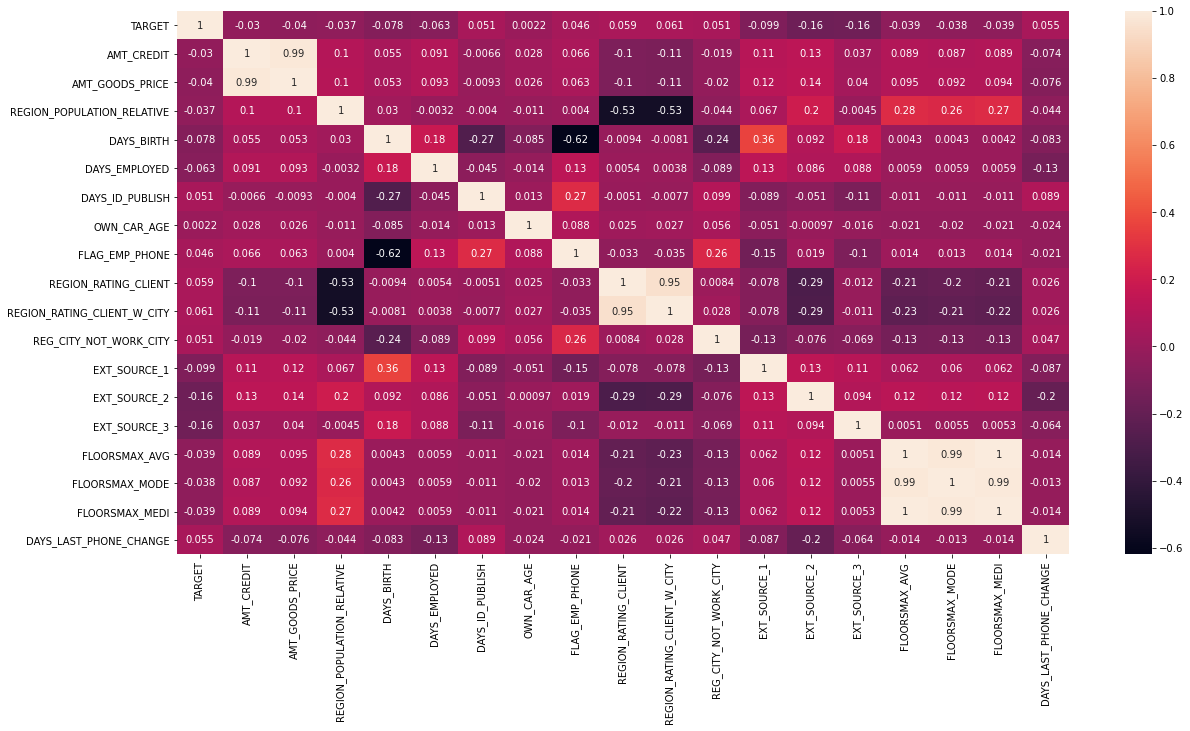

In [72]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

In [73]:
df_train.columns

Index(['TARGET', 'CODE_GENDER', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [74]:
df_train.dtypes

TARGET                           int64
CODE_GENDER                     object
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_EMP_PHONE                   int64
OCCUPATION_TYPE                 object
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE               object
EXT_SOURCE_1                   float64
EXT_SOURCE_2                   float64
EXT_SOURCE_3                   float64
FLOORSMAX_AVG                  float64
FLOORSMAX_MODE                 float64
FLOORSMAX_MEDI                 float64
DAYS_LAST_PHONE_CHANGE         float64
dtype: object

In [75]:
categorical_variables = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']

In [76]:
df_train.shape

(307511, 24)

In [77]:
vif_train = df_train.drop(categorical_variables, axis=1)

In [78]:
vif_train.shape

(307511, 19)

In [79]:
#VIF

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [82]:
vif = calc_vif(vif_train)

In [83]:
len(vif[vif['VIF'] >=5])

13

In [84]:
vif[vif['VIF'] >=5]

,variables,VIF
1,AMT_CREDIT,121.572999
2,AMT_GOODS_PRICE,118.530135
4,DAYS_BIRTH,24.064602
6,DAYS_ID_PUBLISH,5.380859
8,FLAG_EMP_PHONE,7.994482
9,REGION_RATING_CLIENT,181.178771
10,REGION_RATING_CLIENT_W_CITY,181.740745
12,EXT_SOURCE_1,16.317462
13,EXT_SOURCE_2,9.221514
14,EXT_SOURCE_3,9.915302


In [85]:
vif['variables'].values

array(['TARGET', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'DAYS_LAST_PHONE_CHANGE'], dtype=object)

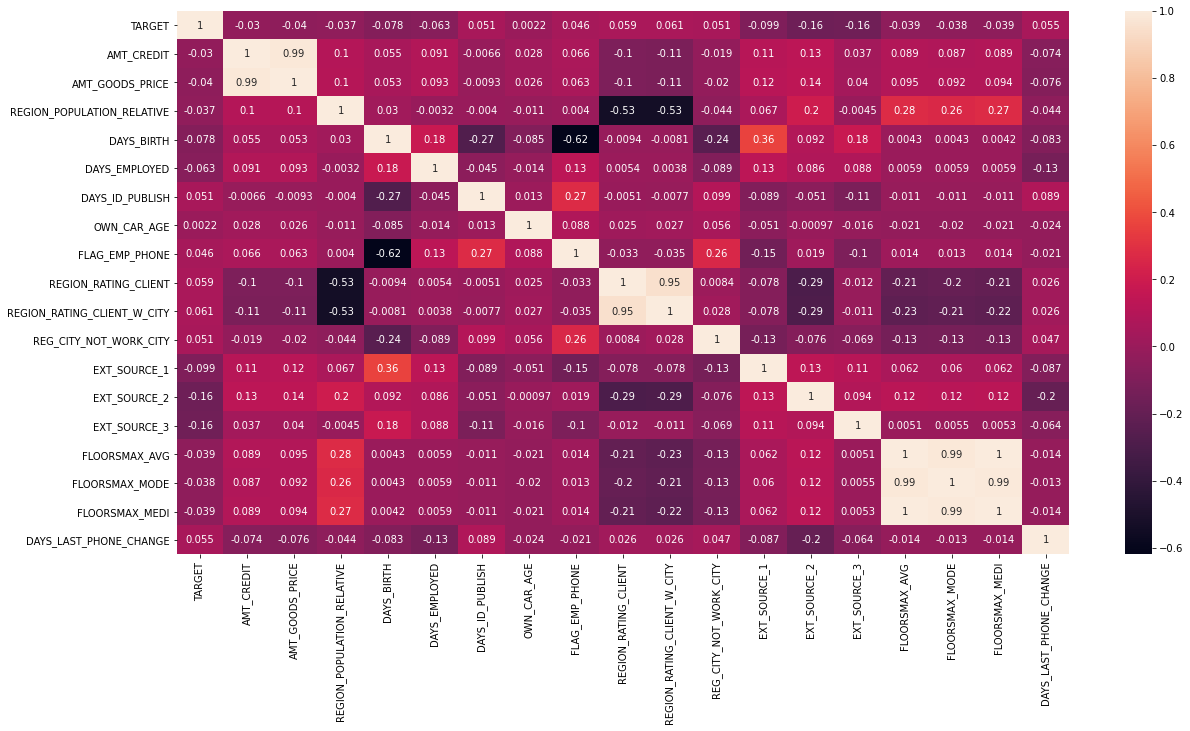

In [86]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train[['TARGET', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'DAYS_LAST_PHONE_CHANGE']].corr(),annot=True)
plt.show()

In [87]:
x = ['AMT_GOODS_PRICE','FLOORSMAX_MODE','FLOORSMAX_MEDI','REGION_RATING_CLIENT_W_CITY']

In [88]:
vif_1_train = vif_train.drop(x, axis=1)

In [89]:
vif_1 = calc_vif(vif_1_train)

In [90]:
vif_1

,variables,VIF
0,TARGET,1.134090
1,AMT_CREDIT,3.383415
2,REGION_POPULATION_RELATIVE,4.221399
3,DAYS_BIRTH,23.857482
4,DAYS_EMPLOYED,2.426947
5,DAYS_ID_PUBLISH,5.376163
6,OWN_CAR_AGE,1.224084
7,FLAG_EMP_PHONE,7.954434
8,REGION_RATING_CLIENT,15.539820
9,REG_CITY_NOT_WORK_CITY,1.442009


In [91]:
vif_1['variables'].values

array(['TARGET', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG',
       'DAYS_LAST_PHONE_CHANGE'], dtype=object)

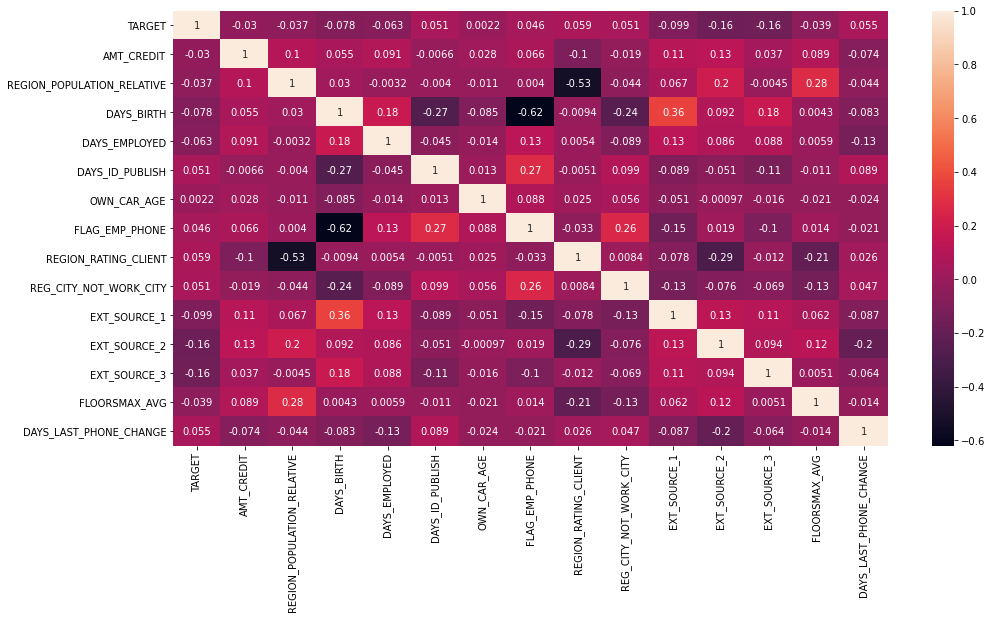

In [92]:
plt.figure(figsize=(16,8))
sns.heatmap(df_train[['TARGET', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG',
       'DAYS_LAST_PHONE_CHANGE']].corr(),annot=True)
plt.show()

In [93]:
vif_1_train = vif_1_train.drop(['TARGET','FLAG_EMP_PHONE'], axis=1)

In [94]:
calc_vif(vif_1_train)

,variables,VIF
0,AMT_CREDIT,3.334886
1,REGION_POPULATION_RELATIVE,4.004466
2,DAYS_BIRTH,18.306828
3,DAYS_EMPLOYED,2.249477
4,DAYS_ID_PUBLISH,5.344407
5,OWN_CAR_AGE,1.218208
6,REGION_RATING_CLIENT,11.896851
7,REG_CITY_NOT_WORK_CITY,1.335745
8,EXT_SOURCE_1,15.662785
9,EXT_SOURCE_2,8.650391


In [95]:
vif_1_train = vif_1_train.drop(['REGION_POPULATION_RELATIVE'], axis=1)

In [96]:
calc_vif(vif_1_train)

,variables,VIF
0,AMT_CREDIT,3.314357
1,DAYS_BIRTH,17.997808
2,DAYS_EMPLOYED,2.248407
3,DAYS_ID_PUBLISH,5.337063
4,OWN_CAR_AGE,1.216720
5,REGION_RATING_CLIENT,10.842471
6,REG_CITY_NOT_WORK_CITY,1.323360
7,EXT_SOURCE_1,15.430614
8,EXT_SOURCE_2,8.337056
9,EXT_SOURCE_3,9.598869


In [97]:
vif_1_train = vif_1_train.drop(['REGION_RATING_CLIENT'], axis=1)

In [98]:
calc_vif(vif_1_train)

,variables,VIF
0,AMT_CREDIT,3.311962
1,DAYS_BIRTH,16.730974
2,DAYS_EMPLOYED,2.247135
3,DAYS_ID_PUBLISH,5.274390
4,OWN_CAR_AGE,1.204641
5,REG_CITY_NOT_WORK_CITY,1.272714
6,EXT_SOURCE_1,14.785915
7,EXT_SOURCE_2,8.332040
8,EXT_SOURCE_3,9.045533
9,FLOORSMAX_AVG,4.242318


In [99]:
vif_1_train.columns

Index(['AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [100]:
df_train.columns

Index(['TARGET', 'CODE_GENDER', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [101]:
b = df_train[['TARGET','AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT']]

In [102]:
a = df_train[categorical_variables]

In [103]:
a

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,M,Working,Secondary / secondary special,Laborers,Business Entity Type 3
1,F,State servant,Higher education,Core staff,School
2,M,Working,Secondary / secondary special,Laborers,Government
3,F,Working,Secondary / secondary special,Laborers,Business Entity Type 3
4,M,Working,Secondary / secondary special,Core staff,Religion
...,...,...,...,...,...
307506,M,Working,Secondary / secondary special,Sales staff,Services
307507,F,Pensioner,Secondary / secondary special,Cleaning staff,XNA
307508,F,Working,Higher education,Managers,School
307509,F,Commercial associate,Secondary / secondary special,Laborers,Business Entity Type 1


In [104]:
b

,TARGET,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT
0,1,406597.5,25.920548,1.745205,-2120,0.0,0,0.083037,0.262949,0.139376,0.0833,-1134.0,2
1,0,1293502.5,45.931507,3.254795,-291,0.0,0,0.311267,0.622246,0.535276,0.2917,-828.0,1
2,0,135000.0,52.180822,0.616438,-2531,26.0,0,0.505998,0.555912,0.729567,0.1667,-815.0,2
3,0,312682.5,52.068493,8.326027,-2437,0.0,0,0.505998,0.650442,0.535276,0.1667,-617.0,2
4,0,513000.0,54.608219,8.323288,-3458,0.0,1,0.505998,0.322738,0.535276,0.1667,-1106.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,254700.0,25.553425,0.646575,-1982,0.0,0,0.145570,0.681632,0.535276,0.6042,-273.0,1
307507,0,269550.0,56.917808,4.515068,-4090,0.0,0,0.505998,0.115992,0.535276,0.0833,0.0,2
307508,0,677664.0,41.002740,21.701370,-5150,0.0,1,0.744026,0.535722,0.218859,0.1667,-1909.0,3
307509,1,370107.0,32.769863,13.112329,-931,0.0,1,0.505998,0.514163,0.661024,0.0417,-322.0,2


In [105]:
final = pd.concat([b,a],axis=1)

## Dummy Variable

In [106]:
dummies = pd.get_dummies(final[categorical_variables],drop_first = True)

In [107]:
final = final.drop(categorical_variables,axis=1)

In [108]:
final = pd.concat([final, dummies], axis=1)

In [109]:
final.shape

(307511, 100)

In [110]:
final.columns

Index(['TARGET', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'REG_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'CODE_GENDER_M',
       'CODE_GENDER_XNA', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 

## Logistic Regression & Decision Tree

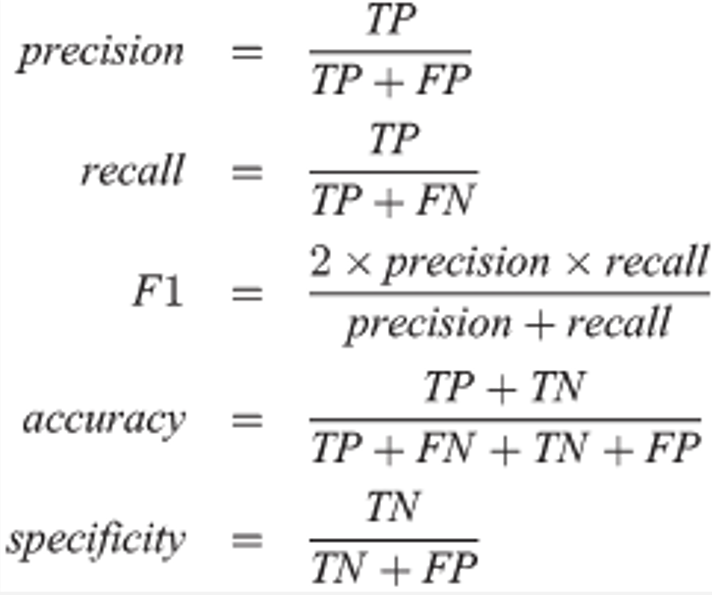

In [111]:
len(train[train['TARGET']==0]),len(train[train['TARGET']==1])

(282686, 24825)

In [112]:
len(train[train['TARGET']==0])*100/len(train),len(train[train['TARGET']==1])*100/len(train)

(91.92711805431351, 8.072881945686495)

In [113]:
#Weights
#0 - 0.544
#1 - 6.194

#### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, classification_report, roc_auc_score

In [115]:
lr = LogisticRegression(class_weight={0:0.544,1:6.194})

In [116]:
y = final[['TARGET']]
X = final.drop('TARGET',axis=1)

In [117]:
y.shape,X.shape

((307511, 1), (307511, 99))

In [118]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [119]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [120]:
model = lr.fit(X_train,y_train)

In [121]:
pred = model.predict(X_valid)

In [122]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[97082, 30127],
       [ 8148,  3023]], dtype=int64)

In [123]:
f1_score(y_valid,pred)

0.13641388957830375

In [124]:
accuracy_score(y_valid,pred)

0.7234065616418558

In [125]:
roc_auc_score(y_valid,pred)

0.5168903385719723

In [126]:
classification_report(y_valid,pred,output_dict=True)

{'0': {'precision': 0.9225696094269695,
  'recall': 0.7631692726143591,
  'f1-score': 0.8353331411682204,
  'support': 127209},
 '1': {'precision': 0.09119155354449472,
  'recall': 0.27061140452958554,
  'f1-score': 0.13641388957830375,
  'support': 11171},
 'accuracy': 0.7234065616418558,
 'macro avg': {'precision': 0.5068805814857321,
  'recall': 0.5168903385719723,
  'f1-score': 0.48587351537326207,
  'support': 138380},
 'weighted avg': {'precision': 0.8554549666876782,
  'recall': 0.7234065616418558,
  'f1-score': 0.7789114981597585,
  'support': 138380}}

#### Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
y = final[['TARGET']]
X = final.drop('TARGET',axis=1)

In [129]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [130]:
dt = DecisionTreeClassifier(criterion='gini')

In [131]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [132]:
pred = dt.predict(X_valid)

In [133]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[116218,  10991],
       [  9322,   1849]], dtype=int64)

In [134]:
f1_score(y_valid,pred)

0.15401274415892716

In [135]:
accuracy_score(y_valid,pred)

0.8532085561497326

In [136]:
roc_auc_score(y_valid,pred)

0.5395583696618663

In [137]:
classification_report(y_valid,pred,output_dict=True)

{'0': {'precision': 0.9257447825394297,
  'recall': 0.9135988805823487,
  'f1-score': 0.9196317295023918,
  'support': 127209},
 '1': {'precision': 0.1440031152647975,
  'recall': 0.16551785874138394,
  'f1-score': 0.15401274415892716,
  'support': 11171},
 'accuracy': 0.8532085561497326,
 'macro avg': {'precision': 0.5348739489021136,
  'recall': 0.5395583696618663,
  'f1-score': 0.5368222368306594,
  'support': 138380},
 'weighted avg': {'precision': 0.8626371357326302,
  'recall': 0.8532085561497326,
  'f1-score': 0.8578256181765366,
  'support': 138380}}

## Feature Engineering

In [138]:
lr = LogisticRegression(class_weight={0:0.544,1:6.194})

In [139]:
y = final[['TARGET']]
X = final.drop('TARGET',axis=1)

In [140]:
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='roc_auc') #10-fold cross-validation for calculating ROC_AUC score
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('ROC_AUC:',cv_scores)                                                     #ROC_AUC-score is printed


ROC_AUC: [0.5522986452165157]


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 99 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AMT_CREDIT                                         307511 non-null  float64
 1   DAYS_BIRTH                                         307511 non-null  float64
 2   DAYS_EMPLOYED                                      307511 non-null  float64
 3   DAYS_ID_PUBLISH                                    307511 non-null  int64  
 4   OWN_CAR_AGE                                        307511 non-null  float64
 5   REG_CITY_NOT_WORK_CITY                             307511 non-null  int64  
 6   EXT_SOURCE_1                                       307511 non-null  float64
 7   EXT_SOURCE_2                                       307511 non-null  float64
 8   EXT_SOURCE_3                                       307511 non-null  float6

In [142]:
X.columns

Index(['AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'DAYS_LAST_PHONE_CHANGE',
       'REGION_RATING_CLIENT', 'CODE_GENDER_M', 'CODE_GENDER_XNA',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 'OCCUPATIO

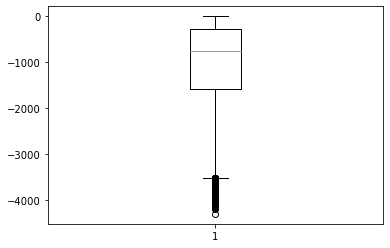

In [143]:
plt.boxplot(X['DAYS_LAST_PHONE_CHANGE'])
plt.show()

In [144]:
X['DAYS_LAST_PHONE_CHANGE'].describe()

count    307511.000000
mean       -962.855657
std         826.808966
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### Log Transformation

In [145]:
X.describe()

,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,5.990260e+05,43.936973,6.168784,-2994.202373,4.108965,0.230454,0.504311,5.145034e-01,0.515695,0.196633,...,0.000208,0.000159,0.002052,0.025466,0.000654,0.007167,0.003860,0.017554,0.004315,0.180072
std,4.024908e+05,11.956133,5.852585,1509.450419,9.006742,0.421124,0.139408,1.908699e-01,0.174736,0.106761,...,0.014425,0.012622,0.045252,0.157535,0.025558,0.084356,0.062009,0.131323,0.065549,0.384248
min,4.500000e+04,20.517808,-0.000000,-7197.000000,0.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.700000e+05,34.008219,2.556164,-4299.000000,0.000000,0.000000,0.505998,3.929737e-01,0.417100,0.166700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.135310e+05,43.150685,4.515068,-3254.000000,0.000000,0.000000,0.505998,5.659614e-01,0.535276,0.166700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.086500e+05,53.923288,7.561644,-1720.000000,5.000000,0.000000,0.505998,6.634218e-01,0.636376,0.166700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.050000e+06,69.120548,49.073973,0.000000,91.000000,1.000000,0.962693,8.549997e-01,0.896010,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
# 'AMT_CREDIT' 'DAYS_EMPLOYED' 'DAYS_LAST_PHONE_CHANGE' 'EXT_SOURCE_1' 'EXT_SOURCE_3' 'FLOORSMAX_AVG' 'OWN_CAR_AGE'

In [147]:
X['AMT_CREDIT'] = np.log(X['AMT_CREDIT'])
X['DAYS_EMPLOYED'] = np.log(X['DAYS_EMPLOYED']+1)
X['DAYS_LAST_PHONE_CHANGE'] = (X['DAYS_LAST_PHONE_CHANGE']*-1)/365
X['DAYS_LAST_PHONE_CHANGE'] = np.log(X['DAYS_LAST_PHONE_CHANGE']+1)
X['EXT_SOURCE_1'] = np.log(X['EXT_SOURCE_1'])
X['EXT_SOURCE_3'] = np.log(X['EXT_SOURCE_3'])
X['FLOORSMAX_AVG'] = np.log(X['FLOORSMAX_AVG']+1)
X['OWN_CAR_AGE'] = np.log(X['OWN_CAR_AGE']+1)

In [148]:
X.describe()

,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,13.070105,43.936973,1.714275,-2994.202373,0.768826,0.230454,-0.736025,5.145034e-01,-0.761476,0.175941,...,0.000208,0.000159,0.002052,0.025466,0.000654,0.007167,0.003860,0.017554,0.004315,0.180072
std,0.715196,11.956133,0.705527,1509.450419,1.167231,0.421124,0.359915,1.908699e-01,0.589023,0.082425,...,0.014425,0.012622,0.045252,0.157535,0.025558,0.084356,0.062009,0.131323,0.065549,0.384248
min,10.714418,20.517808,0.000000,-7197.000000,0.000000,0.000000,-4.228919,8.170000e-08,-7.547807,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.506177,34.008219,1.268683,-4299.000000,0.000000,0.000000,-0.681223,3.929737e-01,-0.874430,0.154179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.149066,43.150685,1.707484,-3254.000000,0.000000,0.000000,-0.681223,5.659614e-01,-0.624972,0.154179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.603121,53.923288,2.147292,-1720.000000,1.791759,0.000000,-0.681223,6.634218e-01,-0.451965,0.154179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.214227,69.120548,3.913501,0.000000,4.521789,1.000000,-0.038021,8.549997e-01,-0.109804,0.693147,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
X['DAYS_LAST_PHONE_CHANGE'].describe()

count    307511.000000
mean          1.076642
std           0.683270
min           0.000000
25%           0.560007
50%           1.122971
75%           1.667965
max           2.546229
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [150]:
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='roc_auc') #10-fold cross-validation for calculating ROC_AUC score
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('ROC_AUC:',cv_scores)                                                     #roc_auc-score is printed

ROC_AUC: [0.7217999283691562]


In [151]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [152]:
model = lr.fit(X_train,y_train)

In [153]:
pred = model.predict(X_valid)

In [154]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[88725, 38484],
       [ 4045,  7126]], dtype=int64)

In [155]:
print('Accuracy: ', (c[0][0]+c[1][1])/np.sum(c))
print('Precision: ', (c[1][1])/(c[0][1]+c[1][1]))
print('Sensitivity/Recall: ', (c[1][1])/np.sum(c[1]))
print('Specificity: ', (c[0][0])/(c[0][0]+c[0][1]))
print('F1-score: ', (2*((c[1][1])/(c[0][1]+c[1][1]))*((c[1][1])/np.sum(c[1])))/(((c[1][1])/(c[0][1]+c[1][1]))+(c[1][1])/np.sum(c[1])))

Accuracy:  0.6926651250180662
Precision:  0.15623766717825038
Sensitivity/Recall:  0.6379017097842629
Specificity:  0.6974742353135391
F1-score:  0.25099945404272556


#### X^2 Transformation

In [156]:
y = final[['TARGET']]
X = final.drop('TARGET',axis=1)

In [157]:
X = X**2

In [158]:
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='roc_auc') #10-fold cross-validation for calculating ROC_AUC score
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('ROC_AUC:',cv_scores)                                                     #roc_auc-score is printed

ROC_AUC: [0.5190041735594846]


In [159]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [160]:
model = lr.fit(X_train,y_train)

In [161]:
pred = model.predict(X_valid)

In [162]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[127209,      0],
       [ 11171,      0]], dtype=int64)

In [163]:
print('Accuracy: ', (c[0][0]+c[1][1])/np.sum(c))
print('Precision: ', (c[1][1])/(c[0][1]+c[1][1]))
print('Sensitivity/Recall: ', (c[1][1])/np.sum(c[1]))
print('Specificity: ', (c[0][0])/(c[0][0]+c[0][1]))
print('F1-score: ', (2*((c[1][1])/(c[0][1]+c[1][1]))*((c[1][1])/np.sum(c[1])))/(((c[1][1])/(c[0][1]+c[1][1]))+(c[1][1])/np.sum(c[1])))

Accuracy:  0.9192730163318399
Precision:  nan
Sensitivity/Recall:  0.0
Specificity:  1.0
F1-score:  nan


#### Interaction Term + Log Transformation

In [164]:
# Make a new dataframe for polynomial features
poly_features = final[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','TARGET']]

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [165]:
poly_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_1  307511 non-null  float64
 1   EXT_SOURCE_2  307511 non-null  float64
 2   EXT_SOURCE_3  307511 non-null  float64
 3   DAYS_BIRTH    307511 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [166]:
# Train the polynomial features
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)

In [167]:
poly_features.shape

(307511, 35)

In [168]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [169]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

In [170]:
poly_features

,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083037,0.262949,0.139376,25.920548,0.006895,0.021834,0.011573,2.152364,0.069142,...,0.009637,1.792198,0.005108,0.949953,176.668535,0.002707,0.503522,93.643075,17415.363116,1
1,1.0,0.311267,0.622246,0.535276,45.931507,0.096887,0.193685,0.166614,14.296977,0.387190,...,0.207254,17.784211,0.178286,15.298562,1312.753978,0.153368,13.160326,1129.274083,96901.852559,0
2,1.0,0.505998,0.555912,0.729567,52.180822,0.256034,0.281290,0.369159,26.403388,0.309038,...,0.225464,16.125870,0.295894,21.163234,1513.658642,0.388325,27.774159,1986.492038,142079.933974,0
3,1.0,0.505998,0.650442,0.535276,52.068493,0.256034,0.329122,0.270849,26.346550,0.423074,...,0.226462,22.028846,0.186365,18.128478,1763.430664,0.153368,14.918699,1451.202418,141164.348604,0
4,1.0,0.505998,0.322738,0.535276,54.608219,0.256034,0.163305,0.270849,27.631646,0.104160,...,0.055754,5.687992,0.092471,9.433796,962.424162,0.153368,15.646383,1596.224610,162844.855121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.145570,0.681632,0.535276,25.553425,0.021191,0.099226,0.077920,3.719824,0.464623,...,0.248701,11.872701,0.195302,9.323464,445.090609,0.153368,7.321584,349.523354,16685.811649,0
307507,1.0,0.505998,0.115992,0.535276,56.917808,0.256034,0.058692,0.270849,28.800293,0.013454,...,0.007202,0.765781,0.033234,3.533902,375.772199,0.153368,16.308128,1734.100687,184393.031346,0
307508,1.0,0.744026,0.535722,0.218859,41.002740,0.553575,0.398591,0.162837,30.507121,0.286998,...,0.062812,11.767696,0.025661,4.807472,900.668623,0.010483,1.964002,367.951287,68934.817362,0
307509,1.0,0.505998,0.514163,0.661024,32.769863,0.256034,0.260165,0.334477,16.581483,0.264363,...,0.174750,8.663153,0.224665,11.137615,552.140902,0.288836,14.318861,709.849330,35190.373617,1


In [171]:
poly_features = poly_features.drop(['1','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'],axis=1)

In [172]:
poly_features = poly_features.drop(['TARGET'],axis=1)

In [173]:
poly_features

,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2,EXT_SOURCE_3 DAYS_BIRTH,DAYS_BIRTH^2,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,0.006895,0.021834,0.011573,2.152364,0.069142,0.036649,6.815772,0.019426,3.612697,671.874806,...,0.018181,0.009637,1.792198,0.005108,0.949953,176.668535,0.002707,0.503522,93.643075,17415.363116
1,0.096887,0.193685,0.166614,14.296977,0.387190,0.333073,28.580686,0.286521,24.586045,2109.703321,...,0.240927,0.207254,17.784211,0.178286,15.298562,1312.753978,0.153368,13.160326,1129.274083,96901.852559
2,0.256034,0.281290,0.369159,26.403388,0.309038,0.405575,29.007949,0.532268,38.069390,2722.838176,...,0.171798,0.225464,16.125870,0.295894,21.163234,1513.658642,0.388325,27.774159,1986.492038,142079.933974
3,0.256034,0.329122,0.270849,26.346550,0.423074,0.348166,33.867519,0.286521,27.871028,2711.127979,...,0.275185,0.226462,22.028846,0.186365,18.128478,1763.430664,0.153368,14.918699,1451.202418,141164.348604
4,0.256034,0.163305,0.270849,27.631646,0.104160,0.172754,17.624163,0.286521,29.230483,2982.057602,...,0.033616,0.055754,5.687992,0.092471,9.433796,962.424162,0.153368,15.646383,1596.224610,162844.855121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.021191,0.099226,0.077920,3.719824,0.464623,0.364862,17.418041,0.286521,13.678141,652.977512,...,0.316702,0.248701,11.872701,0.195302,9.323464,445.090609,0.153368,7.321584,349.523354,16685.811649
307507,0.256034,0.058692,0.270849,28.800293,0.013454,0.062088,6.602015,0.286521,30.466751,3239.636892,...,0.001561,0.007202,0.765781,0.033234,3.533902,375.772199,0.153368,16.308128,1734.100687,184393.031346
307508,0.553575,0.398591,0.162837,30.507121,0.286998,0.117248,21.966060,0.047899,8.973822,1681.224665,...,0.153751,0.062812,11.767696,0.025661,4.807472,900.668623,0.010483,1.964002,367.951287,68934.817362
307509,0.256034,0.260165,0.334477,16.581483,0.264363,0.339874,16.849045,0.436952,21.661651,1073.863922,...,0.135926,0.174750,8.663153,0.224665,11.137615,552.140902,0.288836,14.318861,709.849330,35190.373617


In [174]:
X = pd.concat([final,poly_features],axis=1)
X = X.drop('TARGET',axis=1)
y = final['TARGET']

In [175]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [176]:
X

,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,406597.5,25.920548,1.745205,-2120,0.0,0,0.083037,0.262949,0.139376,0.0833,...,0.018181,0.009637,1.792198,0.005108,0.949953,176.668535,0.002707,0.503522,93.643075,17415.363116
1,1293502.5,45.931507,3.254795,-291,0.0,0,0.311267,0.622246,0.535276,0.2917,...,0.240927,0.207254,17.784211,0.178286,15.298562,1312.753978,0.153368,13.160326,1129.274083,96901.852559
2,135000.0,52.180822,0.616438,-2531,26.0,0,0.505998,0.555912,0.729567,0.1667,...,0.171798,0.225464,16.125870,0.295894,21.163234,1513.658642,0.388325,27.774159,1986.492038,142079.933974
3,312682.5,52.068493,8.326027,-2437,0.0,0,0.505998,0.650442,0.535276,0.1667,...,0.275185,0.226462,22.028846,0.186365,18.128478,1763.430664,0.153368,14.918699,1451.202418,141164.348604
4,513000.0,54.608219,8.323288,-3458,0.0,1,0.505998,0.322738,0.535276,0.1667,...,0.033616,0.055754,5.687992,0.092471,9.433796,962.424162,0.153368,15.646383,1596.224610,162844.855121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,254700.0,25.553425,0.646575,-1982,0.0,0,0.145570,0.681632,0.535276,0.6042,...,0.316702,0.248701,11.872701,0.195302,9.323464,445.090609,0.153368,7.321584,349.523354,16685.811649
307507,269550.0,56.917808,4.515068,-4090,0.0,0,0.505998,0.115992,0.535276,0.0833,...,0.001561,0.007202,0.765781,0.033234,3.533902,375.772199,0.153368,16.308128,1734.100687,184393.031346
307508,677664.0,41.002740,21.701370,-5150,0.0,1,0.744026,0.535722,0.218859,0.1667,...,0.153751,0.062812,11.767696,0.025661,4.807472,900.668623,0.010483,1.964002,367.951287,68934.817362
307509,370107.0,32.769863,13.112329,-931,0.0,1,0.505998,0.514163,0.661024,0.0417,...,0.135926,0.174750,8.663153,0.224665,11.137615,552.140902,0.288836,14.318861,709.849330,35190.373617


In [177]:
X['AMT_CREDIT'] = np.log(X['AMT_CREDIT'])
X['DAYS_EMPLOYED'] = np.log(X['DAYS_EMPLOYED']+1)
X['DAYS_LAST_PHONE_CHANGE'] = (X['DAYS_LAST_PHONE_CHANGE']*-1)/365
X['DAYS_LAST_PHONE_CHANGE'] = np.log(X['DAYS_LAST_PHONE_CHANGE']+1)
X['EXT_SOURCE_1'] = np.log(X['EXT_SOURCE_1'])
X['EXT_SOURCE_3'] = np.log(X['EXT_SOURCE_3'])
X['FLOORSMAX_AVG'] = np.log(X['FLOORSMAX_AVG']+1)
X['OWN_CAR_AGE'] = np.log(X['OWN_CAR_AGE']+1)

In [178]:
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='roc_auc') #10-fold cross-validation for calculating ROC_AUC score
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('ROC_AUC:',cv_scores)                                                     #roc_auc-score is printed

ROC_AUC: [0.7138588274739024]


In [179]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [180]:
model = lr.fit(X_train,y_train)

In [181]:
pred = model.predict(X_valid)

In [182]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[78101, 49108],
       [ 3290,  7881]], dtype=int64)

In [183]:
print('Accuracy: ', (c[0][0]+c[1][1])/np.sum(c))
print('Precision: ', (c[1][1])/(c[0][1]+c[1][1]))
print('Sensitivity/Recall: ', (c[1][1])/np.sum(c[1]))
print('Specificity: ', (c[0][0])/(c[0][0]+c[0][1]))
print('F1-score: ', (2*((c[1][1])/(c[0][1]+c[1][1]))*((c[1][1])/np.sum(c[1])))/(((c[1][1])/(c[0][1]+c[1][1]))+(c[1][1])/np.sum(c[1])))

Accuracy:  0.6213470154646625
Precision:  0.1382898454087631
Sensitivity/Recall:  0.7054874227911556
Specificity:  0.6139581318931837
F1-score:  0.23125


#### Domain Knowledge Features + Log Transformation

In [184]:
final.columns

Index(['TARGET', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'REG_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'CODE_GENDER_M',
       'CODE_GENDER_XNA', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 

In [185]:
final['DAYS_EMPLOYED_PERCENT'] = final['DAYS_EMPLOYED'] / final['DAYS_BIRTH']

In [186]:
y = final[['TARGET']]
X = final.drop('TARGET',axis=1)

In [187]:
X['AMT_CREDIT'] = np.log(X['AMT_CREDIT'])
X['DAYS_EMPLOYED'] = np.log(X['DAYS_EMPLOYED']+1)
X['DAYS_LAST_PHONE_CHANGE'] = (X['DAYS_LAST_PHONE_CHANGE']*-1)/365
X['DAYS_LAST_PHONE_CHANGE'] = np.log(X['DAYS_LAST_PHONE_CHANGE']+1)
X['EXT_SOURCE_1'] = np.log(X['EXT_SOURCE_1'])
X['EXT_SOURCE_3'] = np.log(X['EXT_SOURCE_3'])
X['FLOORSMAX_AVG'] = np.log(X['FLOORSMAX_AVG']+1)
X['OWN_CAR_AGE'] = np.log(X['OWN_CAR_AGE']+1)

In [188]:
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='roc_auc') #10-fold cross-validation for calculating ROC_AUC score
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('ROC_AUC:',cv_scores)                                                     #ROC_AUC-score is printed

ROC_AUC: [0.7167162775454321]


In [189]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [190]:
model = lr.fit(X_train,y_train)

In [191]:
pred = model.predict(X_valid)

In [192]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[85557, 41652],
       [ 3983,  7188]], dtype=int64)

In [193]:
print('Accuracy: ', (c[0][0]+c[1][1])/np.sum(c))
print('Precision: ', (c[1][1])/(c[0][1]+c[1][1]))
print('Sensitivity/Recall: ', (c[1][1])/np.sum(c[1]))
print('Specificity: ', (c[0][0])/(c[0][0]+c[0][1]))
print('F1-score: ', (2*((c[1][1])/(c[0][1]+c[1][1]))*((c[1][1])/np.sum(c[1])))/(((c[1][1])/(c[0][1]+c[1][1]))+(c[1][1])/np.sum(c[1])))

Accuracy:  0.6702196849255673
Precision:  0.14717444717444716
Sensitivity/Recall:  0.6434517948258884
Specificity:  0.6725703370044572
F1-score:  0.2395560813850794


#### Log transformation+Grid Search weights

In [194]:
y = final[['TARGET']]
X = final.drop('TARGET',axis=1)

In [195]:
# 'AMT_CREDIT' 'DAYS_EMPLOYED' 'DAYS_LAST_PHONE_CHANGE' 'EXT_SOURCE_1' 'EXT_SOURCE_3' 'FLOORSMAX_AVG' 'OWN_CAR_AGE'

In [196]:
X['AMT_CREDIT'] = np.log(X['AMT_CREDIT'])
X['DAYS_EMPLOYED'] = np.log(X['DAYS_EMPLOYED']+1)
X['DAYS_LAST_PHONE_CHANGE'] = (X['DAYS_LAST_PHONE_CHANGE']*-1)/365
X['DAYS_LAST_PHONE_CHANGE'] = np.log(X['DAYS_LAST_PHONE_CHANGE']+1)
X['EXT_SOURCE_1'] = np.log(X['EXT_SOURCE_1'])
X['EXT_SOURCE_3'] = np.log(X['EXT_SOURCE_3'])
X['FLOORSMAX_AVG'] = np.log(X['FLOORSMAX_AVG']+1)
X['OWN_CAR_AGE'] = np.log(X['OWN_CAR_AGE']+1)

In [197]:
#abcde - #interrupting kernel

SyntaxError: invalid syntax (<ipython-input-197-34241d4f0d80>, line 1)

In [198]:
'''
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,10)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=5, 
                          scoring='roc_auc', 
                          verbose=2).fit(X, y)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)
'''

"\nfrom sklearn.model_selection import GridSearchCV, StratifiedKFold\nlr = LogisticRegression()\n\n#Setting the range for class weights\nweights = np.linspace(0.0,0.99,10)\n\n#Creating a dictionary grid for grid search\nparam_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}\n\n#Fitting grid search to the train data with 5 folds\ngridsearch = GridSearchCV(estimator= lr, \n                          param_grid= param_grid,\n                          cv=5, \n                          scoring='roc_auc', \n                          verbose=2).fit(X, y)\n\n#Ploting the score for different values of weight\nsns.set_style('whitegrid')\nplt.figure(figsize=(12,8))\nweigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})\nsns.lineplot(weigh_data['weight'], weigh_data['score'])\nplt.xlabel('Weight for class 1')\nplt.ylabel('F1 score')\nplt.xticks([round(i/10,1) for i in range(0,11,1)])\nplt.title('Scoring for different class weights', fonts

In [199]:
#gridsearch.best_params_

In [200]:
lr = LogisticRegression(class_weight={0:0.11,1:0.89})

In [201]:
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='roc_auc') #10-fold cross-validation for calculating ROC_AUC score
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('ROC_AUC:',cv_scores)                                                     #ROC_AUC-score is printed

ROC_AUC: [0.718911474292552]


In [202]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [203]:
model = lr.fit(X_train,y_train)

In [204]:
pred = model.predict(X_valid)

In [205]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[104919,  22290],
       [  6138,   5033]], dtype=int64)

In [206]:
print('Accuracy: ', (c[0][0]+c[1][1])/np.sum(c))
print('Precision: ', (c[1][1])/(c[0][1]+c[1][1]))
print('Sensitivity/Recall: ', (c[1][1])/np.sum(c[1]))
print('Specificity: ', (c[0][0])/(c[0][0]+c[0][1]))
print('F1-score: ', (2*((c[1][1])/(c[0][1]+c[1][1]))*((c[1][1])/np.sum(c[1])))/(((c[1][1])/(c[0][1]+c[1][1]))+(c[1][1])/np.sum(c[1])))

Accuracy:  0.7945656886833358
Precision:  0.184203784357501
Sensitivity/Recall:  0.4505415808790619
Specificity:  0.8247765488290922
F1-score:  0.26149529796851456


#### Log transformation+Grid Search weights+Business Intuitive Variable

In [207]:
lr = LogisticRegression(class_weight={0:0.11,1:0.89})

In [208]:
final['DAYS_EMPLOYED_PERCENT'] = final['DAYS_EMPLOYED'] / final['DAYS_BIRTH']

In [209]:
y = final[['TARGET']]
X = final.drop('TARGET',axis=1)

In [210]:
X['AMT_CREDIT'] = np.log(X['AMT_CREDIT'])
X['DAYS_EMPLOYED'] = np.log(X['DAYS_EMPLOYED']+1)
X['DAYS_LAST_PHONE_CHANGE'] = (X['DAYS_LAST_PHONE_CHANGE']*-1)/365
X['DAYS_LAST_PHONE_CHANGE'] = np.log(X['DAYS_LAST_PHONE_CHANGE']+1)
X['EXT_SOURCE_1'] = np.log(X['EXT_SOURCE_1'])
X['EXT_SOURCE_3'] = np.log(X['EXT_SOURCE_3'])
X['FLOORSMAX_AVG'] = np.log(X['FLOORSMAX_AVG']+1)
X['OWN_CAR_AGE'] = np.log(X['OWN_CAR_AGE']+1)

In [211]:
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='roc_auc') #10-fold cross-validation for calculating ROC_AUC score
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('ROC_AUC:',cv_scores)                                                     #ROC_AUC-score is printed

ROC_AUC: [0.718911474292552]


In [212]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X,y, test_size=0.45, stratify = y)

In [213]:
model = lr.fit(X_train,y_train)

In [214]:
pred = model.predict(X_valid)

In [215]:
#confusion matrix
c = confusion_matrix(y_valid, pred)
c

array([[104377,  22832],
       [  5882,   5289]], dtype=int64)

In [216]:
print('Accuracy: ', (c[0][0]+c[1][1])/np.sum(c))
print('Precision: ', (c[1][1])/(c[0][1]+c[1][1]))
print('Sensitivity/Recall: ', (c[1][1])/np.sum(c[1]))
print('Specificity: ', (c[0][0])/(c[0][0]+c[0][1]))
print('F1-score: ', (2*((c[1][1])/(c[0][1]+c[1][1]))*((c[1][1])/np.sum(c[1])))/(((c[1][1])/(c[0][1]+c[1][1]))+(c[1][1])/np.sum(c[1])))

Accuracy:  0.7924989160283278
Precision:  0.1880800825006223
Sensitivity/Recall:  0.47345806105093546
Specificity:  0.8205158440047481
F1-score:  0.26921510740099763
